<a href="https://colab.research.google.com/github/themightyNJ/learningDeepLearning/blob/master/SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Sigmoid Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Sigmoid Function:-

## $S_{w,b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [2]:
def sigmoid(x, w, b):
    return 1/(1 + np.exp(-(w*x + b)))

In [3]:
sigmoid(1, 0.5, 0)

0.6224593312018546

In [4]:
w = 2    #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = -2    #@param {type: "slider", min: -2, max: 2, step: 0.1}
x = np.linspace(-10, 10, 100)
Y = sigmoid(x, w, b)

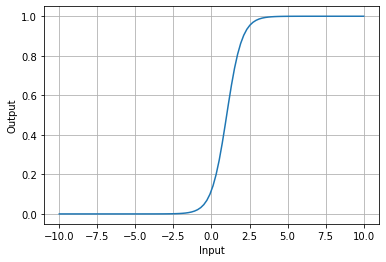

In [5]:
plt.plot(x,Y)
plt.xlabel("Input")
plt.ylabel('Output')
plt.grid()
plt.show()

Sigmoid Function w/ 2 inputs:

## $S_{w_1,w_2,b}(x_1,x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [6]:
def sigmoid_2d(x1, x2, w1, w2, b):
    return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [7]:
sigmoid_2d(1, 0, 0.5, 0 ,0)

0.6224593312018546

## Creating a 3D plot for 2 i/p and 1 o/p.

In [8]:
from mpl_toolkits import mplot3d
%matplotlib inline

In [9]:
#defining the data
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100) 
#Making a grid to plot every combination of data
X1,X2 = np.meshgrid(x1,x2)

In [10]:
w1 = 0.5
w2 = 2
b = 0
Y = sigmoid_2d(X1,X2, w1, w2, b)

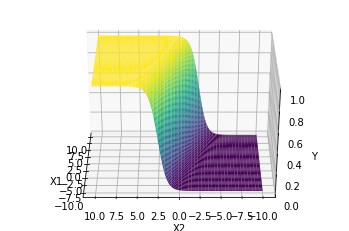

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
#To view from different height and angle respectively
ax.view_init(30,180)

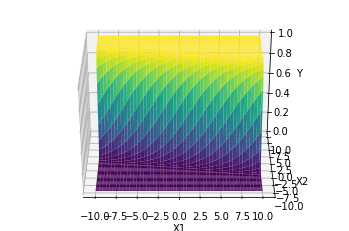

In [12]:
#To view from different angles
ax.view_init(30,270)
fig 

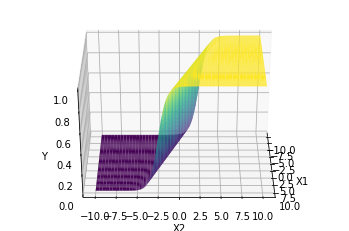

In [13]:
#To view from different angles
ax.view_init(30,0)
fig 

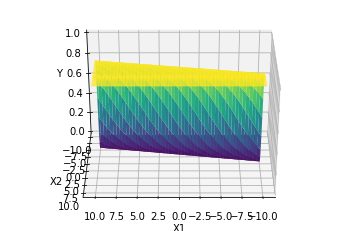

In [14]:
#To view from different angles
ax.view_init(30,90)
fig 

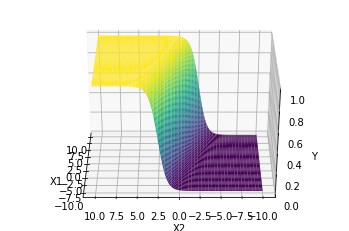

In [15]:
#To view from different angles
ax.view_init(30,180)
fig 

# Compute Loss for a Given Dataset

In [16]:
# Dataset
w_unknown = 0.5
b_unknown = 0.25
X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

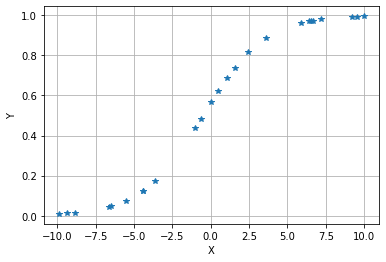

In [17]:
plt.plot(X,Y,"*")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

In [18]:
#Function to calculate Loss
def calculate_loss(X, Y, w_est, b_est):
    loss = 0
    for x,y in zip(X,Y):
        loss += (y - sigmoid(x, w_est, b_est))**2
    return loss

In [19]:
#Range of w's and b's for Brute Force method
w = np.linspace(-2, 2, 201)
b = np.linspace(-2, 2, 201)
#Meshgrid of Weights and Bias values
W,B = np.meshgrid(w,b)

Loss = np.zeros(W.shape)

## Plotting Loss

In [20]:
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Loss[i][j] = calculate_loss(X,Y, W[i][j], B[i][j])

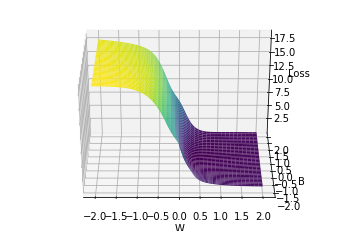

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(W, B, Loss, cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')
#To view from different height and angle respectively
ax.view_init(30,270)

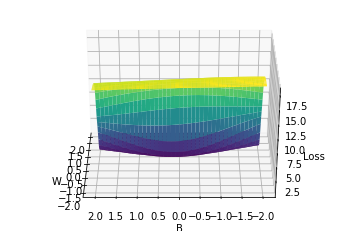

In [22]:
ax.view_init(30,180)
fig

In [23]:
#Co-ordinates of the min Loss
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])
print("Min loss is at index = ", i,",", j)
print("Min loss is at value, w = ", round(W[i][j],2),"b = ", round(B[i][j],2))

Min loss is at index =  113 , 125
Min loss is at value, w =  0.5 b =  0.26


# Class for Sigmoid Neuron

In [23]:
class SigmoidNeuron:

    def __init__():
        self.w = None
        self.b = None
    
    def perceptron(self, x):
        return np.dot(x, self.w) + self.b

    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x

    def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)

    def fit(self, X, Y, epochs = 1, learning_rate = 1):
        #initialize w,b
        self.w = np.random.randn(1, X.shape[1])
        self.b = 0

        for i in range(epochs):
            